# SmartVote-Lite
## Blockchain-Based Voting System with AI Anomaly Detection
## Final Year Project – CSE (Anna University)



### Objective
To design and implement a secure blockchain-based voting system and
integrate an AI-based anomaly detection model to identify suspicious
voting behavior such as vote duplication and sudden vote spikes.


### Technologies Used
- Python 3
- Jupyter Notebook
- Blockchain (SHA-256 hashing)
- Machine Learning (Isolation Forest)
- Pandas (Data Processing)


In [23]:

### Step 1: Import Required Libraries
import hashlib
import time
import random
import pandas as pd
from sklearn.ensemble import IsolationForest
import matplotlib.pyplot as plt
%matplotlib inline


In [24]:
 ### step 2: Define Block Class
class Block:
    def __init__(self, index, data, previous_hash):
        self.index = index
        self.timestamp = time.time()
        self.data = data
        self.previous_hash = previous_hash
        self.hash = self.calculate_hash()

    def calculate_hash(self):
        content = f"{self.index}{self.timestamp}{self.data}{self.previous_hash}"
        return hashlib.sha256(content.encode()).hexdigest()


In [25]:
### step 3: Defince Blockchain Class
class Blockchain:
    def __init__(self):
        self.chain = [self.create_genesis_block()]

    def create_genesis_block(self):
        return Block(0, "Genesis Block", "0")

    def get_latest_block(self):
        return self.chain[-1]

    def add_block(self, data):
        block = Block(
            index=len(self.chain),
            data=data,
            previous_hash=self.get_latest_block().hash
        )
        self.chain.append(block)

    def display_chain(self):
        for block in self.chain:
            print("Index:", block.index)
            print("Hash:", block.hash)
            print("Data:", block.data)
            print("-" * 40)



In [26]:
### Initialize Blockchain & Vote Log
blockchain = Blockchain()
vote_log = []


In [27]:
### step 5: Simulate Real-Time Voting (WITH SPIKE)

regions = ["Chennai", "Madurai", "Coimbatore"]
candidates = ["A", "B"]

for i in range(120):   # simulate large-scale voting
    vote = {
        "voter_id": f"TN{i+1000}",
        "region": random.choice(regions),
        "candidate": random.choice(candidates),
        "timestamp": time.time()
    }

    blockchain.add_block(vote)
    vote_log.append(vote)

    # Artificial abnormal spike in Chennai
    if i > 70 and vote["region"] == "Chennai":
        time.sleep(0.05)   # abnormal fast votes
    else:
        time.sleep(0.3)    # normal voting speed


In [28]:
### step6: convert vote log to dataframe
df = pd.DataFrame(vote_log)
df["time_diff"] = df["timestamp"].diff().fillna(0)
df.head()


,voter_id,region,candidate,timestamp,time_diff
0,TN1000,Coimbatore,B,1.767431e+09,0.000000
1,TN1001,Coimbatore,B,1.767431e+09,0.304653
2,TN1002,Coimbatore,B,1.767431e+09,0.302160
3,TN1003,Madurai,A,1.767431e+09,0.305189
4,TN1004,Coimbatore,B,1.767431e+09,0.305135


In [29]:
### step7:AI Anomaly Detection
X = df[["time_diff"]]

model = IsolationForest(contamination=0.15, random_state=42)
df["anomaly"] = model.fit_predict(X)

df["status"] = df["anomaly"].apply(
    lambda x: "Suspicious Spike" if x == -1 else "Normal"
)



In [30]:
### step8: Display Suspicious Votes
df[df["status"] == "Suspicious Spike"]


,voter_id,region,candidate,timestamp,time_diff,anomaly,status
0,TN1000,Coimbatore,B,1.767431e+09,0.000000,-1,Suspicious Spike
7,TN1007,Chennai,A,1.767431e+09,0.300216,-1,Suspicious Spike
13,TN1013,Madurai,B,1.767431e+09,0.300343,-1,Suspicious Spike
25,TN1025,Chennai,B,1.767431e+09,0.300727,-1,Suspicious Spike
30,TN1030,Madurai,B,1.767431e+09,0.300519,-1,Suspicious Spike
51,TN1051,Coimbatore,B,1.767431e+09,0.300353,-1,Suspicious Spike
52,TN1052,Coimbatore,B,1.767431e+09,0.304904,-1,Suspicious Spike
72,TN1072,Madurai,B,1.767431e+09,0.053198,-1,Suspicious Spike
76,TN1076,Madurai,A,1.767431e+09,0.054120,-1,Suspicious Spike
79,TN1079,Madurai,B,1.767431e+09,0.302792,-1,Suspicious Spike


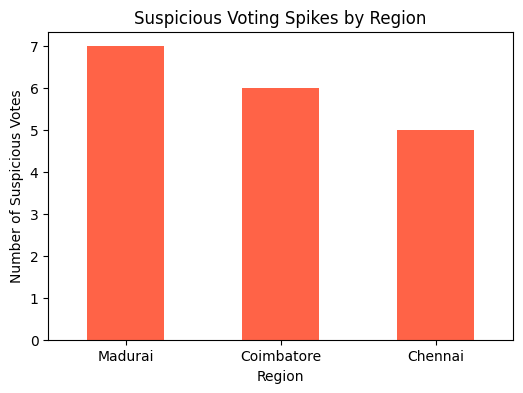

In [31]:
### Step 8.1: Visualize Suspicious Voting Spikes
### This chart shows the number of suspicious votes detected in each region.
# Count the number of suspicious spikes per region
spike_counts = df[df["status"] == "Suspicious Spike"]["region"].value_counts()

# Plot the spikes as a bar chart
plt.figure(figsize=(6,4))
spike_counts.plot(kind="bar", color="tomato")
plt.title("Suspicious Voting Spikes by Region")
plt.xlabel("Region")
plt.ylabel("Number of Suspicious Votes")
plt.xticks(rotation=0)
plt.show()


In [32]:
###step9: Display Blockchain
blockchain.display_chain()


Index: 0
Hash: d5a35e614232e2157d4847c574e76dd5d0cb8b556f8f597eb67511a2cbb22173
Data: Genesis Block
----------------------------------------
Index: 1
Hash: 7a3a2f7901c3d7f5c75e871fd5bf235c5cff21539908621ab792964f4380f116
Data: {'voter_id': 'TN1000', 'region': 'Coimbatore', 'candidate': 'B', 'timestamp': 1767431131.025805}
----------------------------------------
Index: 2
Hash: 54d2764b108a13a9ee2357f6397603431aaad8291ba2bd5e18f7c9e2f472de96
Data: {'voter_id': 'TN1001', 'region': 'Coimbatore', 'candidate': 'B', 'timestamp': 1767431131.3304582}
----------------------------------------
Index: 3
Hash: 0a8c78f21f42427a2d8504bcf41a8217306463e9f51b1306ebd6e7451383b501
Data: {'voter_id': 'TN1002', 'region': 'Coimbatore', 'candidate': 'B', 'timestamp': 1767431131.632618}
----------------------------------------
Index: 4
Hash: 7716e5c7282d06b434e58be5df99108445557dbc7b2474cc3c0f46bca0f88908
Data: {'voter_id': 'TN1003', 'region': 'Madurai', 'candidate': 'A', 'timestamp': 1767431131.937807}
------